# Task 1

Implement basic layer which will consist of simple logical neurons. Allow your solution to stack multiple layers to form MLP network. Perform forward propagation through your network.



In [4]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import math

### Main Processing Cell

Perform following operations:

__A__: Declare a simple model consisting of Input Layer, followed by 1 Dense Layer with single neuron. Perform forward pass for the data example __xIn__ of batch size = 10 and feature vector size = 3. Plot the results. Repeat the process using all 3 activation functions.

__B__: Declare a simple model consisting of Input Layer, followed by 3 Dense Layers of arbitrary size and 1 Dense Layer with 2 neurons. Declare your own input data with batch size 16 and vector size of 10. Perform forward pass through the network and visualize activations of each resulting neuron.

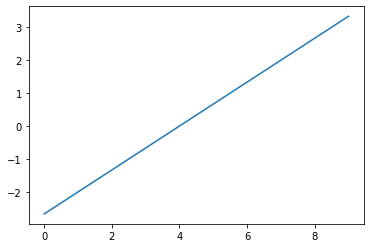

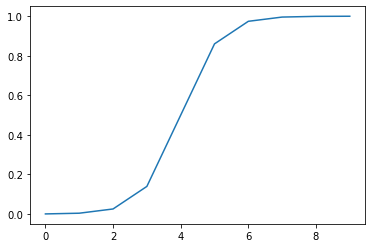

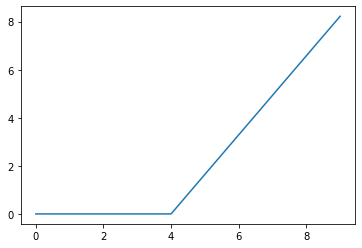

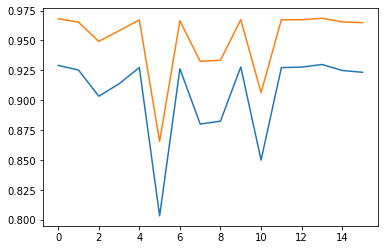

In [143]:
xIn = np.array([[-4, -4, -4],
               [-3, -3, -3],
               [-2, -2, -2],
               [-1, -1, -1],
               [-0, -0, -0],
               [1, 1, 1],
               [2, 2, 2],
               [3, 3, 3],
               [4, 4, 4],
               [5, 5, 5]])
###>>> start of solution
m = Model()
m.addLayer(InputLayer(3)) # number of input features per data
m.addLayer(DenseLayer(1, act="linear"))
m.initialize()

y = m.predict(xIn)
###<<< end of solution
plt.plot(y)
plt.show()

###>>> start of solution
m = Model()
m.addLayer(InputLayer(3))
m.addLayer(DenseLayer(1, act="sigmoid"))
m.initialize()

y = m.predict(xIn)
###<<< end of solution
plt.plot(y)
plt.show()


###>>> start of solution
m = Model()
m.addLayer(InputLayer(3))
m.addLayer(DenseLayer(1, act="relu"))
m.initialize()

y = m.predict(xIn)
###<<< end of solution
plt.plot(y)
plt.show()



# Task B:
xIn = np.random.randn(16, 10)
###>>> start of solution
m = Model()
m.addLayer(InputLayer(10))
m.addLayer(DenseLayer(10, act="sigmoid"))
m.addLayer(DenseLayer(5, act="sigmoid"))
m.addLayer(DenseLayer(2, act="sigmoid"))
m.initialize()

y = m.predict(xIn)
###<<< end of solution
y = np.transpose(y) # predictions are per data for each neuron, we want to plot all activations from first and second neuron to compare

plt.plot(y[0])
plt.plot(y[1])
plt.show()


## Layer

This is the main class which can hold different types of layers and provide us with standard tasks like forward propagation. Perform the variable declaration, provide your solution with variable initialization when later called by your model and also functionality to perform forward pass. We added another class of Neuron to the Dense Layer for simplicity. You can perform the logic of a layer per single neuron using lists and for cycles. You can declare activation function in your __init__ function of the parent class (Layer) and call it later when you perform forward pass, or perform it in one of the child classes.

nUnits - number of neuron units in your layer

prevLayer - previous layer (need it to know the shape of it to create appropriate number of weights for you to use in current layer)

nX - number of units (in case of input layer number of features for each data vector)

In [134]:
#------------------------------------------------------------------------------
#   Layer class
#------------------------------------------------------------------------------
class Layer:
    def __init__(self, act="linear"):
        self.shape = (0, 0)
        #TODO: declare mapping of your activation function here (or later in child class if you like)
        ###>>> start of solution
        
        ###<<< end of solution
        pass

    def initialize(self, prevLayer):
        pass

    def forward(self, x, isTraining):
        pass

#------------------------------------------------------------------------------
#   InputLayer class
#------------------------------------------------------------------------------
class InputLayer(Layer):
    def __init__(self, nX):
        super().__init__(act="linear")

        self.nX = nX

    def initialize(self, prevLayer):
        self.shape = (self.nX, 1)

    def forward(self, x):
        return x
    
#------------------------------------------------------------------------------
#   Basic Dense Layer class
#------------------------------------------------------------------------------
class DenseLayer(Layer):
    def __init__(self, nUnits, act="linear"):
        super().__init__(act)
        ###>>> start of solution
        self.act = act
        self.neurons = []
        self.nX = nUnits
        for n in range(nUnits):
            self.neurons.append(Neuron(self.act))
        ###<<< end of solution
        #pass

    def initialize(self, prevLayer):
        ###>>> start of solution
        #initialize all neurons
        for n in self.neurons:
            n.initialize(prevLayer)
        ###<<< end of solution
        #pass

    def forward(self, X):
        res = []
        ###>>> start of solution
        for n in self.neurons:
            res.append(n.forward(X))
        return res
        print(res)
        ###<<< end of solution
        #pass
    
class Neuron:
    """Single Neuron used in the Dense Layer"""
    def __init__(self, act="linear"):
        ###>>> start of solution
        self.act = act
        self.bias = 0
        ###<<< end of solution
        #pass
    def initialize(self, prevLayer):
        ###>>> start of solution
        self.weights = np.random.rand(prevLayer.nX)
        ###<<< end of solution
        #pass
    def forward(self, X):
        ###>>> start of solution
        fnc = CreateActivationFunction(self.act)
        res = fnc(np.sum(np.multiply(X,self.weights))+self.bias)
        return res
        ###<<< end of solution
        #pass


## Activations

Implement three standard activation functions (Linear, ReLU, Sigmoid), which you will use in your implementation of dense layer for logical neurons.

In [69]:
#------------------------------------------------------------------------------
#   ActivationFunction class
#------------------------------------------------------------------------------
class ActivationFunction:
    def __init__(self):
        pass

    def __call__(self, Z):
        pass

#------------------------------------------------------------------------------
#   LinearActivationFunction class
#------------------------------------------------------------------------------
class LinearActivationFunction(ActivationFunction):
    def __call__(self, Z):
        ###>>> start of solution
        return Z
        ###<<< end of solution
        #pass

    def derivate(self, Z):
        # do not need to implement now
        pass
    
#------------------------------------------------------------------------------
#   SigmoidActivationFunction class
#------------------------------------------------------------------------------
class SigmoidActivationFunction(ActivationFunction):
    def __call__(self, Z):
        ###>>> start of solution
        return 1/(1+math.e**(-Z))
        ###<<< end of solution
        #pass

    def derivate(self, Z):
        # do not need to implement now
        pass

#------------------------------------------------------------------------------
#   RELUActivationFunction class
#------------------------------------------------------------------------------
class RELUActivationFunction(ActivationFunction):
    def __call__(self, Z):
        ###>>> start of solution
        return max(0,Z)
        ###<<< end of solution
        #pass

    def derivate(self, Z):
        # do not need to implement now
        pass
    
# Activation mapping
    
MAP_ACTIVATION_FUCTIONS = {
    "linear": LinearActivationFunction,
    "relu": RELUActivationFunction,
    "sigmoid": SigmoidActivationFunction
}

def CreateActivationFunction(kind):
    if (kind in MAP_ACTIVATION_FUCTIONS):
        return MAP_ACTIVATION_FUCTIONS[kind]()
    raise ValueError(kind, "Unknown activation function {0}".format(kind))

## Model class

This is the basic class which holds all of your layers and encapsulate functionality to predict results from your input as a forward pass through all the layers after you create your model and initialize all the layers.

In [142]:
#------------------------------------------------------------------------------
#   Model class
#------------------------------------------------------------------------------
class Model:
    def __init__(self):
        self.layers = []

    def addLayer(self,  layer):
        self.layers.append(layer)

    def initialize(self):
        ###>>> start of solution
        self.layers[0].initialize(None)
        for i in range(1,len(self.layers)):
            self.layers[i].initialize(self.layers[i-1])
        ###<<< end of solution
        #pass
    
    def predict(self, X):
        ###>>> start of solution
        arr = []
        for x in X:
            res = self.layers[0].forward(x)
            for i in range(1,len(self.layers)):
                res = self.layers[i].forward(res)
            arr.append(res)
        return arr
        ###<<< end of solution
        #pass